## What is the most optimal skill to learn for Data Analysts?

### Methodology
1. Continue from last notebook to find percent of postings with skill
2. Visualize median salary vs percent skill demand
3. (optional) Determine if certain technologies are more prevalent

## Import Libraries and Data
Import the libraries, data and change the job_posted_date to a datetime type.

In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Found cached dataset csv (/Users/aref/.cache/huggingface/datasets/lukebarousse___csv/lukebarousse--data_jobs-8492436fa5796c3e/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1)


  0%|          | 0/1 [00:00<?, ?it/s]

## Clean Data

Filters the original dataset to only get rows where the job title is 'Data Analyst' and the country is 'United States' to create a new DataFrame df_DA_US. Drop NaA values from the 'salary_year_avg' column. Then it uses the explode method on the job_skills column to create a new row in a new DataFrame (df_DA_US_exploded) for each skill associated wiht a job. Fİnally, it displays the first 5 entries of the salary_year_avg and job_skills columns.

In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


## Calculate Percent of Job Postings that Have Skills

Group the data by job skills and calculates the count and median salary for each skill, sorting the results in descending order by count. It then renames the columns. Calculates the percentage that each skill count represents out of the total number of Data Analyst jobs. Finally, filter out any skills that don't have any jobs associated with them.

In [7]:
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills

,count,median
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
couchbase,1,160515.0
chainer,1,100000.0
chef,1,85000.0


In [8]:
df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

df_DA_skills


,skill_count,median_salary
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
couchbase,1,160515.0
chainer,1,100000.0
chef,1,85000.0


In [9]:
DA_job_count = len(df_DA_US)

DA_job_count

4350

In [13]:
df_DA_skills['skill_percent'] = df_DA_skills['skill_count']/ DA_job_count * 100

df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
couchbase,1,160515.0,0.022989
chainer,1,100000.0,0.022989
chef,1,85000.0,0.022989


In [16]:
df_DA_skills = df_DA_skills[df_DA_skills['skill_count'] > 0]

df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
couchbase,1,160515.0,0.022989
chainer,1,100000.0,0.022989
chef,1,85000.0,0.022989


## Median Salary vs Percent Skill Demand

Filters for Data Analyst skills that exceed a certain percentage (skill_limit).




In [17]:
skill_limit = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_limit]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


Create a scatter plot to visualize the relationship between the percentage of Data Analyst jobs that require specific skills and the median salary for those skills.

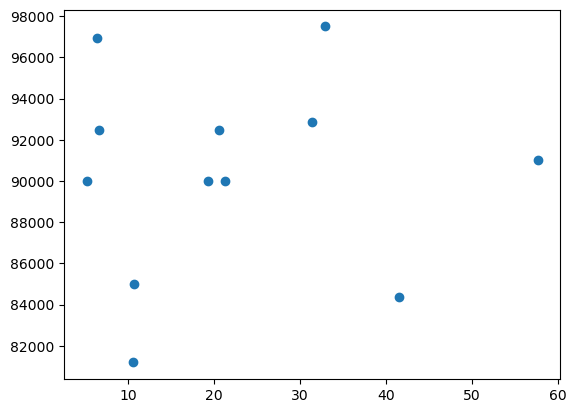

In [18]:
from adjustText import adjust_text

plt.scatter(df_DA_skills_high_demand['skill_percent'], df_DA_skills_high_demand['median_salary'])

Text(0.5, 1.0, 'Most Optimal Skills for Data Analysts in the US')

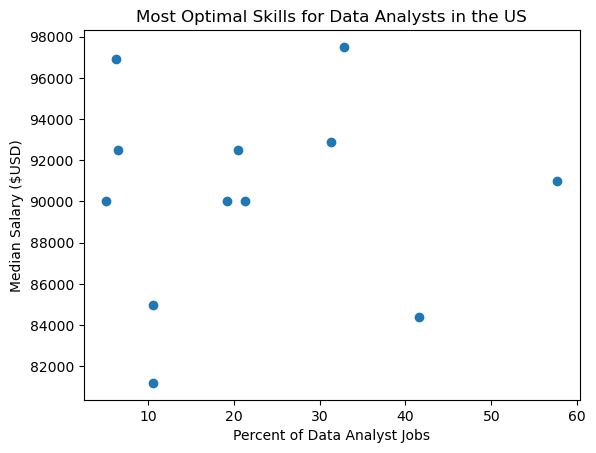

In [19]:
plt.scatter(df_DA_skills_high_demand['skill_percent'], df_DA_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)') 
plt.title('Most Optimal Skills for Data Analysts in the US')

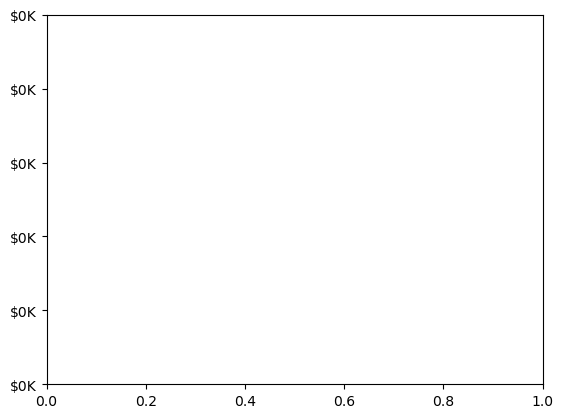

In [20]:
ax = plt.gca()

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))


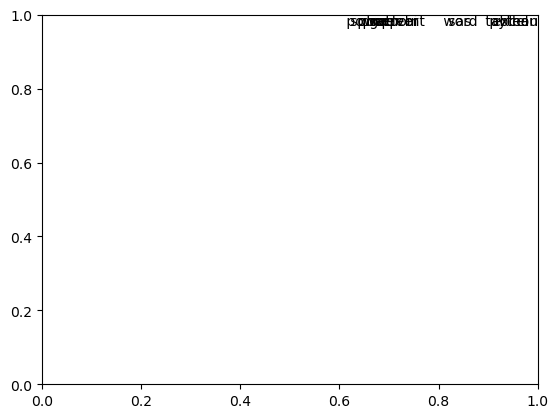

In [24]:
texts = []

for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

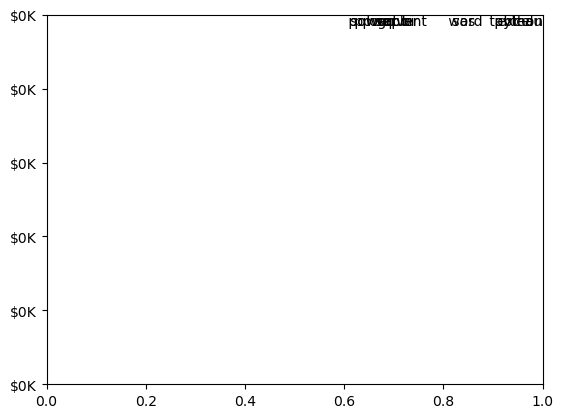

In [26]:
ax = plt.gca()

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

texts = []

for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

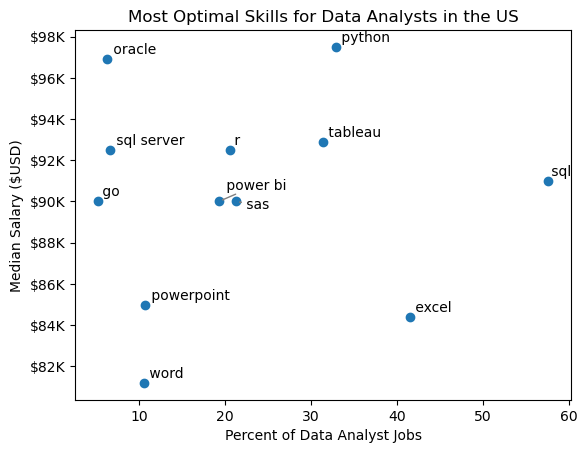

In [27]:
plt.scatter(df_DA_skills_high_demand['skill_percent'], df_DA_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)') 
plt.title('Most Optimal Skills for Data Analysts in the US')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))


texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))


adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

## Coloring by Technology

We're going to add color labels based on technology.

Removes duplicate entries and any rows with missing values. Then, it combines all dictionary entries into a single dictionary, summing values for keys that repeat across entries. To ensure each key's values are unique, it converts the values to a set and then back to a list. The final result is a dictionary where each key represents a skill and each value is a list of unique attributes associated with that skill.

In [29]:
df_technology = df['job_type_skills'].copy()

df_technology = df_technology.drop_duplicates()

df_technology


0                                                      None
1         {'analyst_tools': ['power bi', 'tableau'], 'pr...
2         {'analyst_tools': ['dax'], 'cloud': ['azure'],...
3         {'cloud': ['aws'], 'libraries': ['tensorflow',...
4         {'cloud': ['oracle', 'aws'], 'other': ['ansibl...
                                ...                        
785697    {'analyst_tools': ['power bi', 'tableau', 'wor...
785721    {'analyst_tools': ['looker', 'tableau', 'splun...
785725    {'cloud': ['bigquery'], 'libraries': ['gdpr'],...
785735    {'cloud': ['bigquery', 'aws'], 'libraries': ['...
785736    {'os': ['linux', 'unix'], 'other': ['kubernete...
Name: job_type_skills, Length: 177563, dtype: object

In [30]:
df_technology = df_technology.dropna()

df_technology

1         {'analyst_tools': ['power bi', 'tableau'], 'pr...
2         {'analyst_tools': ['dax'], 'cloud': ['azure'],...
3         {'cloud': ['aws'], 'libraries': ['tensorflow',...
4         {'cloud': ['oracle', 'aws'], 'other': ['ansibl...
5         {'cloud': ['gcp'], 'programming': ['python', '...
                                ...                        
785697    {'analyst_tools': ['power bi', 'tableau', 'wor...
785721    {'analyst_tools': ['looker', 'tableau', 'splun...
785725    {'cloud': ['bigquery'], 'libraries': ['gdpr'],...
785735    {'cloud': ['bigquery', 'aws'], 'libraries': ['...
785736    {'os': ['linux', 'unix'], 'other': ['kubernete...
Name: job_type_skills, Length: 177562, dtype: object

In [31]:
technology_dict = {}

for row in df_technology:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in technology_dict:
            technology_dict[key] += value
        else:                       
            technology_dict[key] = value


In [ ]:
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))


This code converts a dictionary into a pandas DataFrame, then explodes the 'skills' column, creating multiple rows for each 'technology' entry if it contains multiple skills

In [34]:
technology_dict.items()

dict_items([('analyst_tools', ['sas', 'word', 'sap', 'excel', 'dax', 'tableau', 'power bi', 'msaccess', 'powerbi', 'datarobot', 'esquisse', 'outlook', 'visio', 'qlik', 'spss', 'splunk', 'sheets', 'alteryx', 'cognos', 'nuix', 'ssrs', 'spreadsheet', 'ms access', 'looker', 'ssis', 'sharepoint', 'powerpoint', 'microstrategy']), ('programming', ['fortran', 'c++', 'vba', 'sas', 'scala', 'vb.net', 'shell', 'c#', 'objective-c', 'crystal', 'lisp', 'java', 'cobol', 'c', 'groovy', 'sql', 'python', 'typescript', 'elixir', 'delphi', 'swift', 'kotlin', 'no-sql', 'mongo', 'assembly', 'javascript', 'nosql', 'perl', 'haskell', 'go', 'apl', 'visualbasic', 'html', 'pascal', 'matlab', 'bash', 'f#', 'ocaml', 'dart', 'powershell', 'mongodb', 'r', 'golang', 'erlang', 'clojure', 'sass', 'css', 'lua', 'julia', 'rust', 'solidity', 't-sql', 'visual basic', 'php', 'ruby']), ('cloud', ['colocation', 'linode', 'databricks', 'snowflake', 'ovh', 'heroku', 'bigquery', 'aurora', 'aws', 'openstack', 'redshift', 'azure',

In [ ]:
list(technology_dict.items())

In [37]:
pd.DataFrame(list(technology_dict.items()), columns = ["technology", "skills"])

,technology,skills
0,analyst_tools,"[sas, word, sap, excel, dax, tableau, power bi..."
1,programming,"[fortran, c++, vba, sas, scala, vb.net, shell,..."
2,cloud,"[colocation, linode, databricks, snowflake, ov..."
3,libraries,"[airflow, graphql, ionic, hugging face, seleni..."
4,other,"[pulumi, kubernetes, docker, chef, gitlab, ter..."
5,databases,"[sqlite, couchdb, redis, sql server, neo4j, fi..."
6,os,"[fedora, debian, ubuntu, suse, kali, linux, ce..."
7,async,"[airtable, clickup, smartsheet, trello, planne..."
8,webframeworks,"[symfony, jquery, nuxt.js, react.js, phoenix, ..."
9,sync,"[google chat, symphony, zoom, rocketchat, twil..."


In [38]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology

,technology,skills
0,analyst_tools,"[sas, word, sap, excel, dax, tableau, power bi..."
1,programming,"[fortran, c++, vba, sas, scala, vb.net, shell,..."
2,cloud,"[colocation, linode, databricks, snowflake, ov..."
3,libraries,"[airflow, graphql, ionic, hugging face, seleni..."
4,other,"[pulumi, kubernetes, docker, chef, gitlab, ter..."
5,databases,"[sqlite, couchdb, redis, sql server, neo4j, fi..."
6,os,"[fedora, debian, ubuntu, suse, kali, linux, ce..."
7,async,"[airtable, clickup, smartsheet, trello, planne..."
8,webframeworks,"[symfony, jquery, nuxt.js, react.js, phoenix, ..."
9,sync,"[google chat, symphony, zoom, rocketchat, twil..."


In [39]:
df_technology.explode('skills')

,technology,skills
0,analyst_tools,sas
0,analyst_tools,word
0,analyst_tools,sap
0,analyst_tools,excel
0,analyst_tools,dax
...,...,...
9,sync,microsoft teams
9,sync,ringcentral
9,sync,wire
9,sync,slack


In [40]:
df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,sas
0,analyst_tools,word
0,analyst_tools,sap
0,analyst_tools,excel
0,analyst_tools,dax
...,...,...
9,sync,microsoft teams
9,sync,ringcentral
9,sync,wire
9,sync,slack


Merges two DataFrames, df_DA_skills and df_technology, based on the columns 'job_skills' and 'skills' respectively, creating a new DataFrame df_DA_skills_tech.

In [42]:
df_DA_skills.merge(df_technology, left_on='job_skills', right_on='skills')

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.0,57.655172,programming,sql
1,1808,84392.0,41.563218,analyst_tools,excel
2,1431,97500.0,32.896552,programming,python
3,1364,92875.0,31.356322,analyst_tools,tableau
4,926,90000.0,21.287356,analyst_tools,sas
...,...,...,...,...,...
169,1,160515.0,0.022989,databases,couchbase
170,1,100000.0,0.022989,libraries,chainer
171,1,85000.0,0.022989,other,chef
172,1,113269.5,0.022989,libraries,cordova


In [43]:
df_DA_skills_tech = df_DA_skills.merge(df_technology, left_on='job_skills', right_on='skills')

df_DA_skills_tech

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.0,57.655172,programming,sql
1,1808,84392.0,41.563218,analyst_tools,excel
2,1431,97500.0,32.896552,programming,python
3,1364,92875.0,31.356322,analyst_tools,tableau
4,926,90000.0,21.287356,analyst_tools,sas
...,...,...,...,...,...
169,1,160515.0,0.022989,databases,couchbase
170,1,100000.0,0.022989,libraries,chainer
171,1,85000.0,0.022989,other,chef
172,1,113269.5,0.022989,libraries,cordova


Filters df_DA_skills_tech to select rows where the 'percent' column exceeds a specified threshold, storing the result in df_DA_skills_tech_high_demand.

In [44]:
df_DA_skills_tech_high_demand = df_DA_skills_tech[df_DA_skills_tech['skill_percent'] > skill_limit]

df_DA_skills_tech_high_demand

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


Plot the results in a scatter plot, coloring the points based on the 'technology' column.

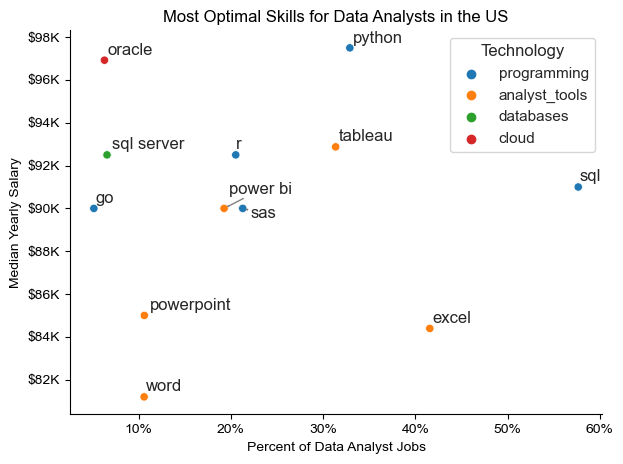

In [45]:
sns.scatterplot(
    data=df_DA_skills_tech_high_demand,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()